Calculating cycle 100 ...


At t = 470.62 and h = 2.01825e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 160.376 and h = 1.319e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 422.518 and h = 2.0112e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 182.518 and h = 2.16809e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 415.349 and h = 2.14423e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 175.348 and h = 4.01944e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 307.622 and h = 6.36656e-10, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 169.821 and h = 1.90494e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 405.035 and h = 3.06403e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 165.035 and h = 1.08908e-11, the corrector convergence failed repeatedly or with |h| = hmin.
At t

After 100 cycles, the discharge energy is: 123.7649 W.h


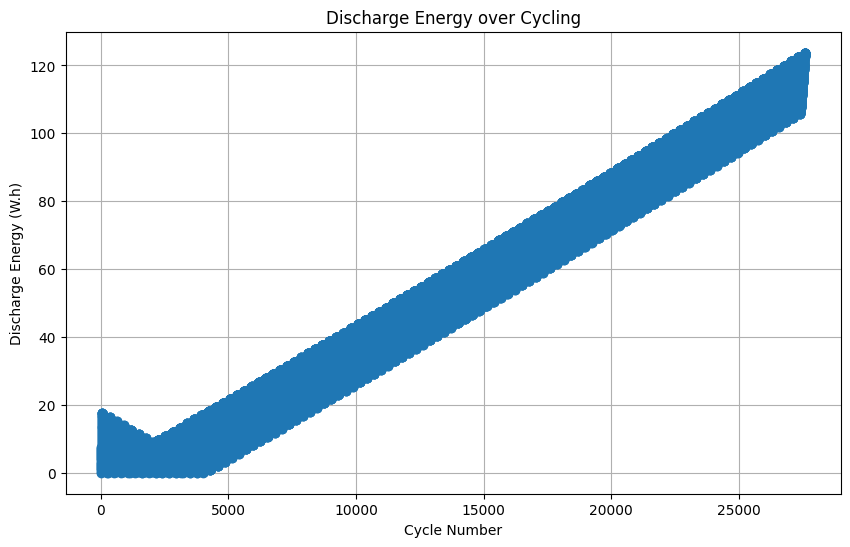

In [4]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np

# Define the battery model
model = pybamm.lithium_ion.DFN(
    {
        "SEI": "solvent-diffusion limited",
        "SEI porosity change": "true",
        "lithium plating": "partially reversible",
        "lithium plating porosity change": "true",
        "particle mechanics": ("swelling and cracking", "swelling only"),
        "SEI on cracks": "true",
        "calculate discharge energy": "true",
    }
)

# Set model parameters
param = pybamm.ParameterValues("OKane2022")
param.update({
    "SEI solvent diffusivity [m2.s-1]": 2e-21,
    'Dead lithium decay constant [s-1]': 7.5e-5,
})

var_pts = {
    "x_n": 5,
    "x_s": 5,
    "x_p": 5,
    "r_n": 30,
    "r_p": 30,
}

# Set target number of cycles
target_cycle = 100
print(f"Calculating cycle {target_cycle} ...")

# Cleaner experiment: simple cycling
exp_k = pybamm.Experiment(
    [
        (
            "Discharge at 1C until 2.5 V",
            "Charge at 0.3C until 4.2 V",
            "Hold at 4.2 V until C/100"
        )
    ] * target_cycle
)

# Run the simulation
sim_k = pybamm.Simulation(model, parameter_values=param, experiment=exp_k, var_pts=var_pts)
sol_k = sim_k.solve()

# Extract discharge energy — take absolute value to match convention
discharge_energy = abs(sol_k["Discharge energy [W.h]"].entries[-1])

# Print discharge energy
print(f"After {target_cycle} cycles, the discharge energy is: {discharge_energy:.4f} W.h")

# Optional: Plot discharge energy over all cycles
discharge_energies = np.abs(sol_k["Discharge energy [W.h]"].entries)
cycles = np.arange(1, len(discharge_energies) + 1)

plt.figure(figsize=(10, 6))
plt.plot(cycles, discharge_energies, marker="o", linestyle="-")
plt.xlabel("Cycle Number")
plt.ylabel("Discharge Energy (W.h)")
plt.title("Discharge Energy over Cycling")
plt.grid(True)
plt.show()
